In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/content/placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
 df.shape

(100, 4)

In [7]:
#step

#0.preprocess+Eda+feature selection
#1.extract input and output
#2.scale the values
#3.train and test split
#4.train the model
#5.evaluate the model/model set
#6.deplay the mode

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [9]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [10]:
import matplotlib.pyplot as plt

# **EDA**

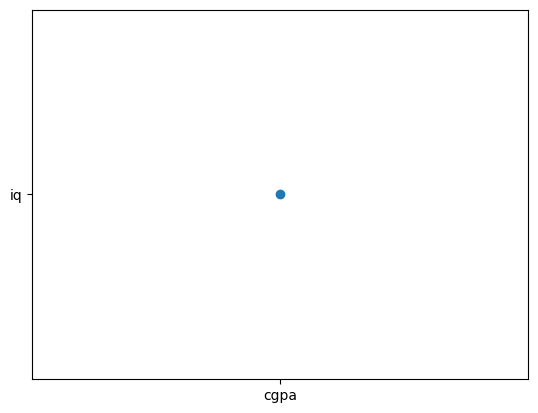

In [11]:
plt.scatter(x="cgpa",y="iq")

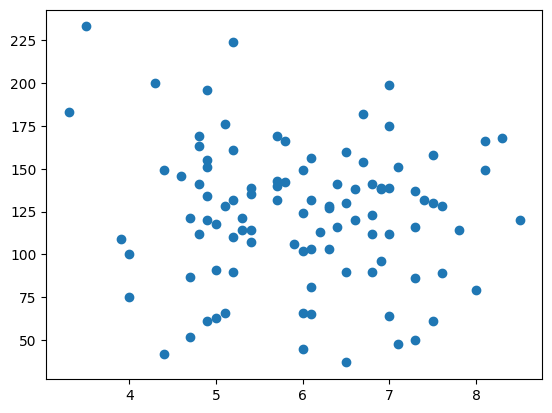

In [12]:
plt.scatter(df['cgpa'],df['iq'])

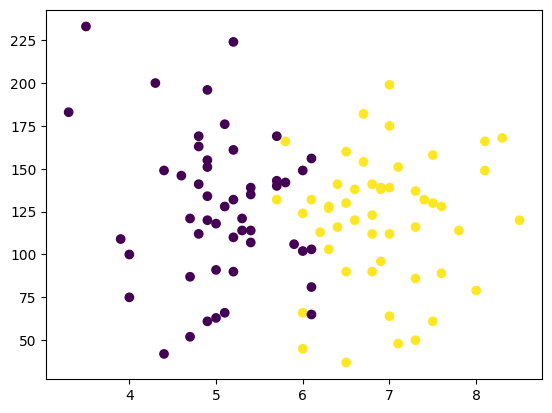

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# **Extract input and output **

In [14]:
#indepent
x=df.iloc[:,0:2]
#depentent
y=df.iloc[:,-1]

In [15]:
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


# **Train Test spilt**

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [21]:
x_train

,Unnamed: 0,cgpa
81,81,5.4
25,25,5.0
93,93,6.8
64,64,7.0
14,14,6.1
...,...,...
82,82,6.5
6,6,5.7
12,12,5.4
35,35,6.8


In [24]:
x_test

,Unnamed: 0,cgpa
68,68,4.0
99,99,6.2
89,89,4.9
63,63,6.3
98,98,6.3
75,75,4.8
2,2,5.3
32,32,7.0
37,37,8.1
44,44,7.5


In [25]:
y_train

,placement
81,0
25,0
93,1
64,1
14,0
...,...
82,1
6,0
12,0
35,1


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [27]:
x_train

array([[ 1.15052943, -0.51925315],
       [-0.81712185, -0.87396119],
       [ 1.57216899,  0.72222497],
       [ 0.55320672,  0.89957899],
       [-1.20362478,  0.10148591],
       [ 0.7640265 ,  0.27883993],
       [ 1.08025617,  0.45619395],
       [ 1.22080269,  1.34296404],
       [-1.06307826, -1.76073128],
       [-0.11438925,  0.0128089 ],
       [ 1.00998291,  1.16561002],
       [ 0.65861661, -0.87396119],
       [-1.02794163, -0.69660717],
       [-1.3441713 ,  0.0128089 ],
       [ 0.72888987,  2.22973413],
       [ 0.58834335,  1.87502609],
       [-1.51985445,  0.988256  ],
       [ 0.34238694,  1.78634909],
       [-1.13335152, -0.69660717],
       [ 1.32621258, -0.78528418],
       [-0.21979914,  1.43164105],
       [-1.37930793, -0.78528418],
       [ 1.04511954,  0.10148591],
       [ 1.29107595, -0.16454512],
       [ 0.09643053, -1.05131521],
       [-0.00897936,  0.54487096],
       [-0.25493577, -0.51925315],
       [ 1.25593932, -0.25322213],
       [-1.66040097,

In [28]:
x_test=scaler.transform(x_test)

In [29]:
x_test

array([[ 0.69375324, -1.76073128],
       [ 1.78298877,  0.19016292],
       [ 1.43162247, -0.9626382 ],
       [ 0.51807009,  0.27883993],
       [ 1.74785214,  0.27883993],
       [ 0.93970965, -1.05131521],
       [-1.62526434, -0.60793016],
       [-0.57116544,  0.89957899],
       [-0.39548229,  1.87502609],
       [-0.14952588,  1.34296404]])

In [31]:
from sklearn.linear_model import LogisticRegression


In [32]:
clf=LogisticRegression()

In [33]:
clf.fit(x_train,y_train)

LogisticRegression()

In [34]:
clf.predict(x_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [35]:
y_test

,placement
68,0
99,1
89,0
63,1
98,1
75,0
2,0
32,1
37,1
44,1


# **Evalute the model**

In [36]:
y_pred=clf.predict(x_test)

In [37]:
y_test

,placement
68,0
99,1
89,0
63,1
98,1
75,0
2,0
32,1
37,1
44,1


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

# **Decision boundry**

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

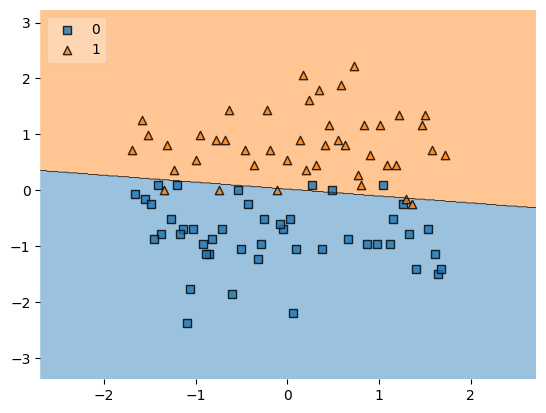

In [46]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [47]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))